# Отчет для фирмы за 2 года 

## Задания
1) Подготовить данные, описать их

2) Посчитать суммарную выручку за все время, за года, кварталы, месяцы, недели, построить графики

3) Найти наиболее/наименее прибыльного заказчика, город, регион, категорию

4) Какие товары покупают чаще всего, какие товары покупают чаще всего в регионе, городе

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 18})

## Задание 1

Подготовить данные, описать их

In [2]:
df = pd.read_excel('data.xlsx', skiprows=1)

In [3]:
df.head()

,Unnamed: 0,Дата,Заказчик,Город,Регион,Категория,Товар,Цена за штуку,Количество
0,NaN,2021-01-01,Sweetables,Гамбург,Север,Крупы,Гречка,1.40,216
1,NaN,2021-01-01,Sweetables,Гамбург,Север,Сухофрукты,Изюм,0.99,127
2,NaN,2021-01-01,Gold Food,Штутгарт,Юг,Масла,Подсолнечное масло,1.19,270
3,NaN,2021-01-01,NutriFix,Штутгарт,Юг,Напитки,Зеленый чай,0.95,196
4,NaN,2021-01-01,NutriFix,Штутгарт,Юг,Сухофрукты,Сушеные яблоки,1.09,108


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
new_columns_name = {'Дата':'date', 'Заказчик':'customer',
                   'Город':'city', 'Регион':'region',
                   'Категория':'category', 'Товар':'product',
                   'Цена за штуку':'piece_price',
                   'Количество':'quantity'}
df = df.rename(columns=new_columns_name)

Период наблюдений

In [6]:
df.date.max(),df.date.min()

(Timestamp('2022-12-31 00:00:00'), Timestamp('2021-01-01 00:00:00'))

In [7]:
df['revenue'] = df.piece_price * df.quantity

Подсчитаем выручку

In [8]:
df.head()

,date,customer,city,region,category,product,piece_price,quantity,revenue
0,2021-01-01,Sweetables,Гамбург,Север,Крупы,Гречка,1.40,216,302.40
1,2021-01-01,Sweetables,Гамбург,Север,Сухофрукты,Изюм,0.99,127,125.73
2,2021-01-01,Gold Food,Штутгарт,Юг,Масла,Подсолнечное масло,1.19,270,321.30
3,2021-01-01,NutriFix,Штутгарт,Юг,Напитки,Зеленый чай,0.95,196,186.20
4,2021-01-01,NutriFix,Штутгарт,Юг,Сухофрукты,Сушеные яблоки,1.09,108,117.72


Размерность таблицы

In [9]:
df.shape

(11028, 9)

Статистическое описание данных

In [10]:
df.describe()

,piece_price,quantity,revenue
count,11028.000000,11028.000000,11028.000000
mean,1.208041,194.540170,228.980648
std,0.982920,214.696829,349.710909
min,0.550000,6.000000,3.900000
25%,0.650000,63.000000,60.200000
50%,0.990000,123.000000,128.090000
75%,1.200000,241.000000,269.280000
max,5.500000,2294.000000,9608.500000


## Задание 2

Посчитать суммарную выручку за все время, за года, кварталы, недели, построить графики

Суммарная выручка, в тыс. у.е.

In [11]:
df.revenue.sum()/1000

2525.19859

In [12]:
df_with_reset_index = df.set_index('date')

In [13]:
df_with_reset_index.head()

,customer,city,region,category,product,piece_price,quantity,revenue
date,,,,,,,,
2021-01-01,Sweetables,Гамбург,Север,Крупы,Гречка,1.40,216,302.40
2021-01-01,Sweetables,Гамбург,Север,Сухофрукты,Изюм,0.99,127,125.73
2021-01-01,Gold Food,Штутгарт,Юг,Масла,Подсолнечное масло,1.19,270,321.30
2021-01-01,NutriFix,Штутгарт,Юг,Напитки,Зеленый чай,0.95,196,186.20
2021-01-01,NutriFix,Штутгарт,Юг,Сухофрукты,Сушеные яблоки,1.09,108,117.72


In [14]:
df_with_reset_index.resample(rule='A').sum()

,piece_price,quantity,revenue
date,,,
2021-12-31,5970.88,963752,1096874.22
2022-12-31,7351.40,1181637,1428324.37


In [15]:
df_year = df_with_reset_index.resample(rule='A').sum()

In [16]:
df_year

,piece_price,quantity,revenue
date,,,
2021-12-31,5970.88,963752,1096874.22
2022-12-31,7351.40,1181637,1428324.37


In [17]:
df_year = df_year.set_index(df_year.index.strftime('%Y'))

In [18]:
df_year

,piece_price,quantity,revenue
date,,,
2021,5970.88,963752,1096874.22
2022,7351.40,1181637,1428324.37


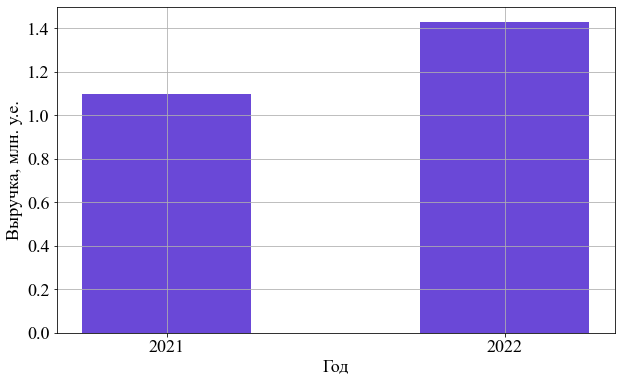

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10,6))
plt.bar(df_year.index,
        df_year.revenue/10**6, width = 0.5, color='#6A48D7')
plt.xlabel('Год')
plt.ylabel('Выручка, млн. у.е.')
plt.grid()
plt.show()
plt.savefig('revenue_year', dpi=300)

In [20]:
df_quart = df_with_reset_index.resample(rule='Q').sum()

In [21]:
df_quart

,piece_price,quantity,revenue
date,,,
2021-03-31,2548.73,394188,448727.83
2021-06-30,1539.69,248657,287874.69
2021-09-30,973.77,159825,182005.97
2021-12-31,908.69,161082,178265.73
2022-03-31,3300.00,522821,621015.41
2022-06-30,1422.38,228556,263122.21
2022-09-30,1405.49,243442,327437.48
2022-12-31,1223.53,186818,216749.27


In [22]:
df_quart['quart_name'] = ['2021 Q1','2021 Q2',
                                  '2021 Q3','2021 Q4',
                                  '2022 Q1','2022 Q2',
                                  '2022 Q3','2022 Q4']

In [23]:
df_quart

,piece_price,quantity,revenue,quart_name
date,,,,
2021-03-31,2548.73,394188,448727.83,2021 Q1
2021-06-30,1539.69,248657,287874.69,2021 Q2
2021-09-30,973.77,159825,182005.97,2021 Q3
2021-12-31,908.69,161082,178265.73,2021 Q4
2022-03-31,3300.00,522821,621015.41,2022 Q1
2022-06-30,1422.38,228556,263122.21,2022 Q2
2022-09-30,1405.49,243442,327437.48,2022 Q3
2022-12-31,1223.53,186818,216749.27,2022 Q4


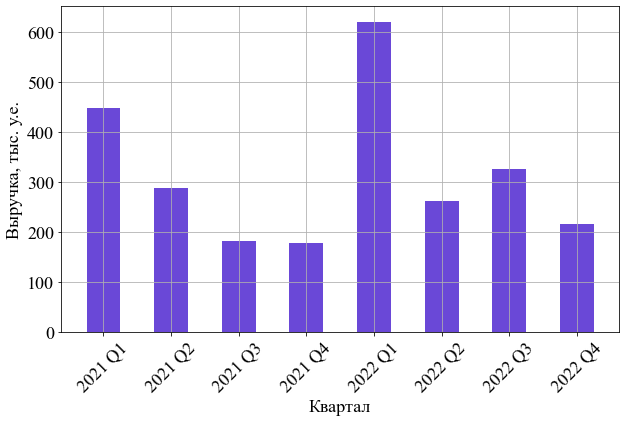

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(10,6))
plt.bar(df_quart.quart_name,
        df_quart.revenue/10**3, width = 0.5, color='#6A48D7')
plt.xlabel('Квартал')
plt.ylabel('Выручка, тыс. у.е.')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.savefig('revenue_quart', dpi=300)

In [25]:
df_month = df_with_reset_index.resample(rule='M').sum()

In [26]:
df_month.head()

,piece_price,quantity,revenue
date,,,
2021-01-31,238.21,38992,46320.71
2021-02-28,1043.60,154494,175277.04
2021-03-31,1266.92,200702,227130.08
2021-04-30,766.26,130065,156139.88
2021-05-31,468.17,74864,82178.21


In [27]:
df_month = df_month.set_index(df_month.index.strftime('%m/%Y'))

In [28]:
df_month.head()

,piece_price,quantity,revenue
date,,,
01/2021,238.21,38992,46320.71
02/2021,1043.60,154494,175277.04
03/2021,1266.92,200702,227130.08
04/2021,766.26,130065,156139.88
05/2021,468.17,74864,82178.21


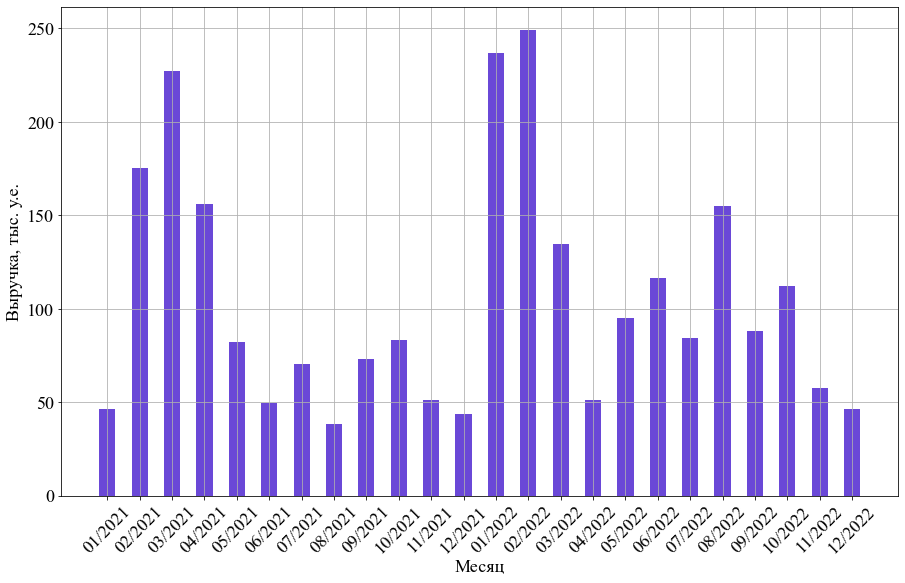

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(15,9))
plt.bar(df_month.index,
        df_month.revenue/10**3, width = 0.5, color='#6A48D7')
plt.xlabel('Месяц')
plt.ylabel('Выручка, тыс. у.е.')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.savefig('revenue_month', dpi=300)

In [30]:
df_week = df_with_reset_index.resample(rule='W').sum()

In [31]:
df_week.head()

,piece_price,quantity,revenue
date,,,
2021-01-03,25.78,3560,4388.07
2021-01-10,51.48,10180,14703.61
2021-01-17,24.97,2314,3177.09
2021-01-24,48.77,5596,6238.96
2021-01-31,87.21,17342,17812.98


Построим линейную регрессию

In [32]:
from scipy import stats

In [33]:
df_week['weeks_from_start'] = [i for i in range(len(df_week))]

In [34]:
x = df_week['weeks_from_start'].values
y = df_week['revenue'].values/10**3
res = stats.linregress(x, y)

In [35]:
print(f"R-squared: {res.rvalue**2:.2f}")

R-squared: 0.01


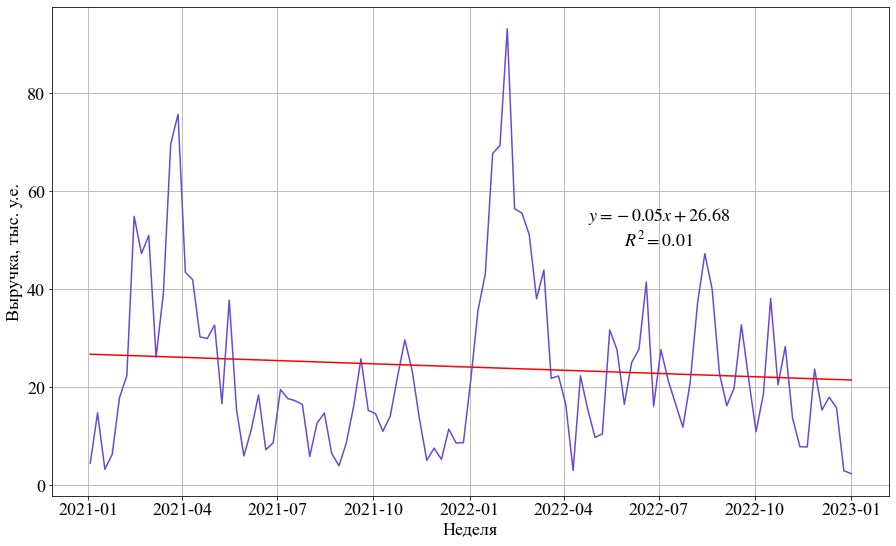

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(15,9))
plt.plot(df_week.index,
        df_week.revenue/10**3, color='#6A48D7')
plt.plot(df_week.index, res.intercept + res.slope*x, color='red')
plt.xlabel('Неделя')
plt.ylabel('Выручка, тыс. у.е.')
plt.text('2022-07',50,f'$R^{2} = {res.rvalue**2:.2f} $',horizontalalignment='center', verticalalignment='center')
plt.text('2022-07',55,f'$y = {res.slope:.2f}x + {res.intercept:.2f} $', \
horizontalalignment='center', verticalalignment='center')
plt.xticks(rotation=0)
plt.grid()
plt.show()
plt.savefig('revenue_week', dpi=300)

Линия тренда продаж, имеет отрицательный наклон

## Задание 3

Найти наиболее/наименее прибыльного заказчика, город, регион, категорию

In [37]:
df_cust = df.groupby('customer',as_index=False).agg({'revenue':'sum'}).sort_values('revenue', ascending = False)
df_cust

,customer,revenue
0,Cooking Corner,535248.48
7,mymeal,400691.35
6,foodbite,386889.82
5,Sweetables,277958.33
3,NutriFix,252670.01
2,Gold Food,242486.43
4,Organica,227542.68
1,Go Bio,201711.49


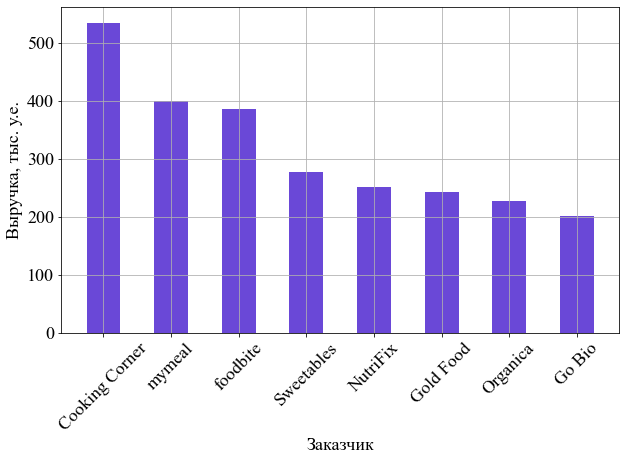

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(10,6))
plt.bar(df_cust.customer,
        df_cust.revenue/10**3, width = 0.5, color='#6A48D7')
plt.xlabel('Заказчик')
plt.ylabel('Выручка, тыс. у.е.')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.savefig('df_cust', dpi=300)

In [39]:
df_city = df.groupby('city',as_index=False).agg({'revenue':'sum'}).sort_values('revenue', ascending = False)
df_city

,city,revenue
0,Берлин,744810.90
2,Гамбург,451815.10
5,Мюнхен,326984.14
7,Штутгарт,275202.48
4,Кёльн,272860.49
6,Франкфурт,192535.03
3,Дрезден,134029.52
1,Бремен,126960.93


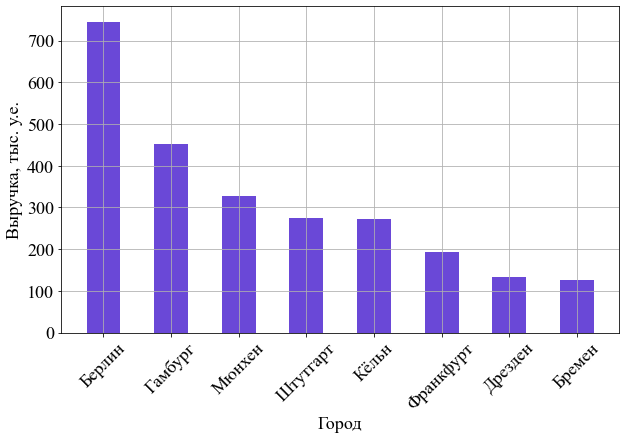

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(10,6))
plt.bar(df_city.city,
        df_city.revenue/10**3, width = 0.5, color='#6A48D7')
plt.xlabel('Город')
plt.ylabel('Выручка, тыс. у.е.')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.savefig('df_city', dpi=300)

In [41]:
df_region = df.groupby('region',as_index=False).agg({'revenue':'sum'}).sort_values('revenue', ascending = False)
df_region

,region,revenue
0,Восток,878840.42
3,Юг,602186.62
2,Север,578776.03
1,Запад,465395.52


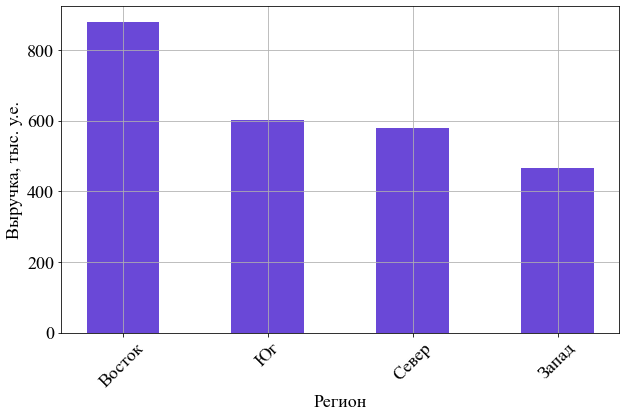

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize=(10,6))
plt.bar(df_region.region,
        df_region.revenue/10**3, width = 0.5, color='#6A48D7')
plt.xlabel('Регион')
plt.ylabel('Выручка, тыс. у.е.')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.savefig('df_region', dpi=300)

In [43]:
df_category = df.groupby('category',as_index=False).agg({'revenue':'sum'}).sort_values('revenue', ascending = False)
df_category

,category,revenue
3,Напитки,615749.04
2,Масла,498528.38
7,Сыры,432000.77
1,Крупы,413948.80
4,Сладости,168594.35
6,Сухофрукты,163627.85
0,Консервы,129914.11
5,Специи,102835.29


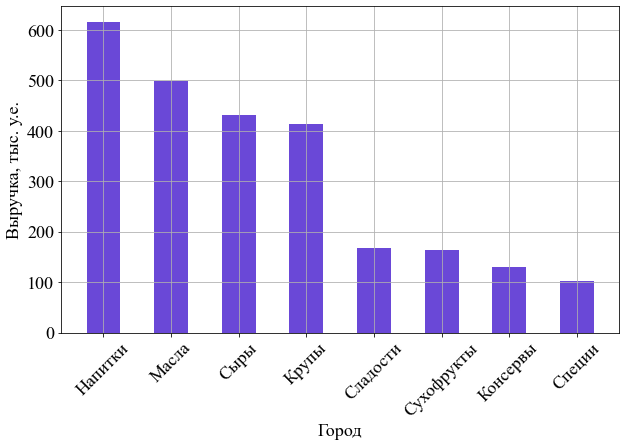

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize=(10,6))
plt.bar(df_category.category,
        df_category.revenue/10**3, width = 0.5, color='#6A48D7')
plt.xlabel('Город')
plt.ylabel('Выручка, тыс. у.е.')
plt.xticks(rotation=45)
plt.grid()
plt.show()
plt.savefig('df_category', dpi=300)

## Задание 4

Какие товары покупают чаще всего, какие товары покупают чаще всего в регионе, городе

In [45]:
df_quant_prod = df.groupby(['city','product'],as_index=True).agg({'quantity':'count'}) \
.sort_values('city', ascending = False)
df_quant_prod.to_csv('city_by_prod_quant.csv', index=True, encoding="utf-16")
df_quant_prod

quantity
city     product                   
Штутгарт Шпроты                  67
         Мармелад                54
         Базилик                 59
         Гауда                   53
         Говядина тушеная        56
...                             ...
Берлин   Черный чай              58
         Шоколад                 53
         Шпроты                  44
         кофе                     1
         Базилик                 55

[193 rows x 1 columns]

In [46]:
df_quant_reg = df.groupby(['region','product'],as_index=True).agg({'quantity':'count'}) \
.sort_values('region', ascending = False)
df_quant_reg.to_csv('reg_by_prod_quant.csv', index=True, encoding="utf-16")
df_quant_reg

quantity
region product                   
Юг     Шпроты                 114
       Мармелад               109
       Гауда                  114
       Говядина тушеная       104
       Гречка                 121
...                           ...
Восток Черный перец           110
       Черный чай             107
       Шоколад                118
       Шпроты                 100
       Базилик                117

[97 rows x 1 columns]

In [47]:
df_quant_reg_city = df.groupby(['region', 'city','product'],as_index=True).agg({'quantity':'count'}) \
.sort_values(['region','city'], ascending = [True, False])
df_quant_reg_city.to_csv('reg_city_by_prod_quant.csv', index=True, encoding="utf-16")
df_quant_reg_city

quantity
region city    product                   
Восток Дрезден Базилик                 62
               Гауда                   57
               Говядина тушеная        55
               Гречка                  45
               Зеленый чай             53
...                                   ...
Юг     Мюнхен  Филадельфия             37
               Черный перец            59
               Черный чай              54
               Шоколад                 51
               Шпроты                  47

[193 rows x 1 columns]